In [126]:
%matplotlib inline

In [241]:
import networkx as nx
import numpy as np
import random
import scipy
import pandas as pd
from matplotlib import pyplot as plt

from helpers import (
    flatten, 
    get_theoretical_kappa, 
    noise_level, 
    signed_layout,
    get_borderless_fig, 
    draw_nodes,
    draw_edges
)
from exp_helpers import run_pipeline
from data_helpers import make_polarized_graphs_fewer_parameters
from tqdm import tqdm

In [128]:
random.seed(12345)
np.random.seed(12345)

# relation of eta and fraction of noise edges

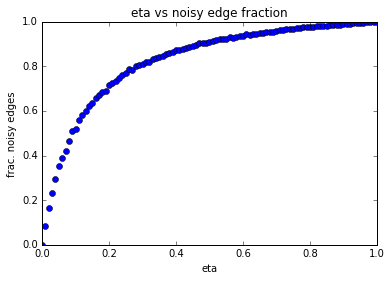

In [227]:
nc, k = 10, 10
nn = 0
eta_list = np.linspace(0, 1, 101)
noisy_edge_fraction = []
for eta in eta_list:
    g, _, _ = make_polarized_graphs_fewer_parameters(nc, nn, k, eta, verbose=0)
    ratio = noise_level(g)
    noisy_edge_fraction.append(ratio)
fig, ax = plt.subplots(1, 1)
ax.plot(eta_list, noisy_edge_fraction, 'o')

# coef = np.polyfit(eta_list, noisy_edge_fraction, deg=4)
# p = np.poly1d(coef)
# x = np.linspace(0, 1, 101)
# y = p(x)
# ax.plot(x, y, color='red')

ax.set_xlabel('eta')
ax.set_ylabel('frac. noisy edges')
ax.set_title('eta vs noisy edge fraction')

# effect of $\kappa$ on  more noisy graph 

In [313]:
nc, k = 10, 10
nn = 0
eta = 0.1

g, true_comms, true_groupings = make_polarized_graphs_fewer_parameters(nc, nn, k, eta, verbose=1)
A = nx.adj_matrix(g, weight='sign')

print('|V|, |E|', g.number_of_nodes(), g.number_of_edges())
print('noisy node ratio: ', nn / g.number_of_nodes())
print('noisy edge ratio: ', noise_level(g))

internal_density 0.95
internal_neg_ratio 0.052631578947368425
#communities 10
comm#1 sizes: 10 10
comm#2 sizes: 10 10
comm#3 sizes: 10 10
comm#4 sizes: 10 10
comm#5 sizes: 10 10
comm#6 sizes: 10 10
comm#7 sizes: 10 10
comm#8 sizes: 10 10
comm#9 sizes: 10 10
comm#10 sizes: 10 10
---------------
num. good edges= 1705
num. noisy edges inside pairs= 100
num. noisy edges among pairs= 1845
|V|, |E| 200 3650
noisy node ratio:  0.0
noisy edge ratio:  0.5328767123287671


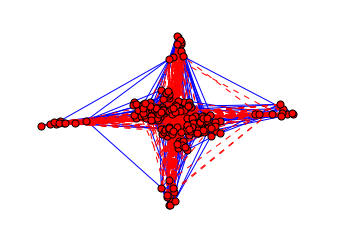

In [261]:
fig, ax = get_borderless_fig()
pos = signed_layout(g)
# draw_nodes(g, pos)
nx.draw_networkx_nodes(g, pos, node_size=50, ax=ax)
draw_edges(g, pos, ax=ax)

In [314]:
n_reps = 1
target_comm = np.random.choice(len(true_comms))        
v1 = np.random.choice(true_groupings[target_comm][0])
v2 = np.random.choice(true_groupings[target_comm][1])
seeds = [[v1], [v2]]


perf = []
for kappa in np.linspace(0, 1.0, 11):
    for i in range(n_reps):            
        res = run_pipeline(g, seeds, kappa, target_comm, true_comms, true_groupings)
        res['kappa'] = kappa
        perf.append(res)


WARN: m less than n, problem likely degenerate
WARN: m less than n, problem likely degenerate
WARN: m less than n, problem likely degenerate
WARN: m less than n, problem likely degenerate
WARN: m less than n, problem likely degenerate
WARN: m less than n, problem likely degenerate
WARN: m less than n, problem likely degenerate
WARN: m less than n, problem likely degenerate
WARN: m less than n, problem likely degenerate
WARN: m less than n, problem likely degenerate
WARN: m less than n, problem likely degenerate


/usr/local/lib/python3.5/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


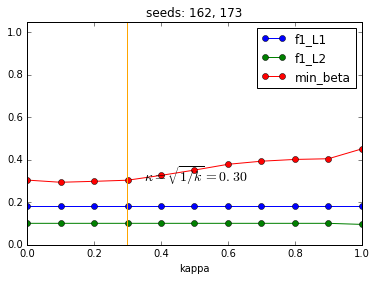

In [315]:
df = pd.DataFrame.from_records(perf)

agg_df = df[['kappa', 'f1_L1', 'f1_L2', 'min_beta']].groupby('kappa').mean()
agg_df.reset_index(level=0, inplace=True)

fig, ax = plt.subplots(1, 1)

seeds_str = ', '.join(map(str, flatten(seeds)))
agg_df.plot(
    x='kappa',
    y=['f1_L1', 'f1_L2', 'min_beta'],
    ylim=[0, 1.05],
    style='-o',
    title='seeds: {}'.format(seeds_str),
    ax=ax
)

theoretical_kappa = get_theoretical_kappa(
    true_comms[target_comm], 
    flatten(seeds),
    A
)

ax.axvline(x=theoretical_kappa, color='orange')
ax.text(
    theoretical_kappa+0.05,
    0.3,
    '$\kappa = \sqrt{{1 / k}}={:.2f}$'.format(theoretical_kappa),
    fontsize=14
)

# fig.savefig('figs/effect-of-kappa/seeds-{}.png'.format(seeds_str))

# look closer at specific result

WARN: m less than n, problem likely degenerate
rank is 195
is rank one?  False
best_t: 4.0025699245291143e-08
comm1: [  8  11  13  14  15  17  21  22  23  24  25  26  27  28  29  42  45  46
  57  60  62  63  64  66  67  68  69  70  71  72  76  77  83  84  85  86
  88  89  93  94  97  99 100 101 103 105 106 107 108 109 112 119 120 123
 124 126 127 128 130 131 132 133 134 135 137 138 139 150 152 153 154 155
 156 158 160 161 162 163 164 165 166 167 168 169 180 181 182 183 184 185
 188 189 193 194 196 198]
comm2: [  0   1   2   3   4   5   6   7   9  10  12  16  18  19  20  30  31  32
  33  34  35  36  37  38  39  40  41  43  44  47  48  49  50  51  52  53
  54  55  56  58  59  65  73  74  75  78  79  80  81  82  87  90  91  92
  95  98 102 104 110 111 113 114 115 116 117 118 121 122 125 129 136 140
 141 142 143 144 145 146 147 148 149 151 157 159 170 171 172 173 174 175
 176 177 178 179 186 187 190 191 192 195 197 199]
nodes ordered by x_opt (asc):
[162 166 165 169 161 163 167 168 160 164

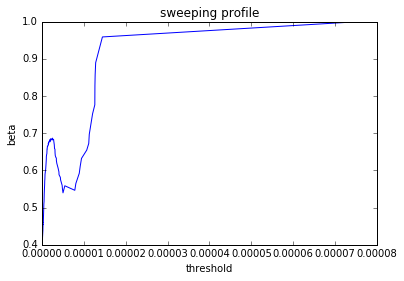

In [316]:
res = run_pipeline(
        g, seeds, 0.8, target_comm, true_comms, true_groupings,
        check_bound=False,
        show_sweep_plot=True,
        plot_returned_subgraph=False,
        plot_true_community=False,
        verbose=2
)

# evaluation under different $\eta$

- $\kappa$ is fixed to be $0.8$ (set from my "experience")
- **10** graphs has 6 pairs, each with 10+10 nodes
- $\eta \in \{0.01, \ldots, 0.09\}$ are considered
- for each noise level, experiments are repeated for **60** times (with random seed pairs) 
- average performance under each $\eta$ is reported 

two plots are show:

- one uses SDP solver
- one uses sparse linear solver (more scalable)

/usr/local/lib/python3.5/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


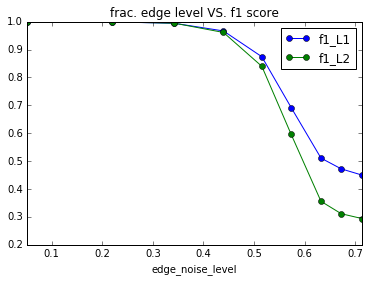

In [339]:
perf_df = pd.read_csv('outputs/effect_of_eta.csv')
avg_df = perf_df[['f1_L1', 'f1_L2', 'eta', 'edge_noise_level']].groupby('eta').mean()

fig, ax = plt.subplots(1, 1)
avg_df.reset_index(level=0, inplace=True)

avg_df.plot(x='edge_noise_level', y=['f1_L1', 'f1_L2'], style=['o-', 'o-'], ax=ax)
ax.set_title('frac. edge level VS. f1 score')

# different number of outliers

/usr/local/lib/python3.5/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


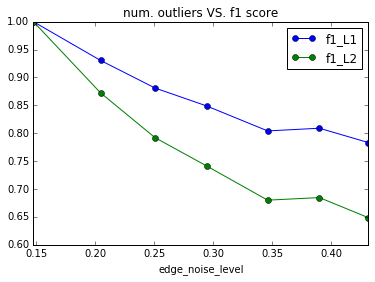

In [345]:
perf_df = pd.read_csv('outputs/effect_of_outlier_size.csv')
avg_df = perf_df[['f1_L1', 'f1_L2', 'nn', 'edge_noise_level']].groupby('nn').mean()

fig, ax = plt.subplots(1, 1)
avg_df.reset_index(level=0, inplace=True)

avg_df.plot(x='edge_noise_level', y=['f1_L1', 'f1_L2'], style=['o-', 'o-'], ax=ax)
ax.set_title('num. outliers VS. f1 score')

# different seed size

/usr/local/lib/python3.5/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


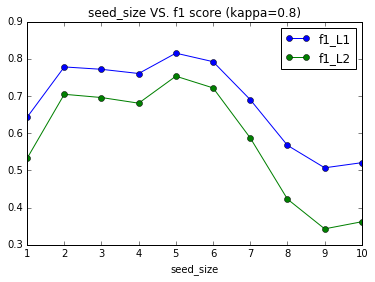

In [381]:
perf_df = pd.read_csv('outputs/effect_of_seed_size.csv')
avg_df = perf_df[['f1_L1', 'f1_L2', 'seed_size']].groupby('seed_size').mean()

fig, ax = plt.subplots(1, 1)
avg_df.reset_index(level=0, inplace=True)

avg_df.plot(x='seed_size', y=['f1_L1', 'f1_L2'], style=['o-', 'o-'], ax=ax)
ax.set_title('seed_size VS. f1 score (kappa=0.8)')

# follow-up: why more seeds gives larger errors -- effect of $\kappa$



/usr/local/lib/python3.5/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


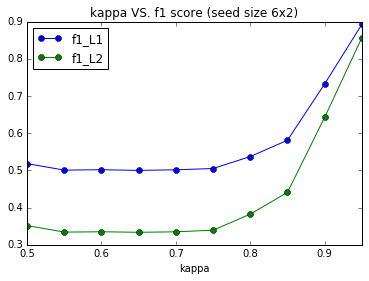

In [380]:
perf_df = pd.read_csv('outputs/effect_of_kappa.csv')
avg_df = perf_df[['f1_L1', 'f1_L2', 'kappa']].groupby('kappa').mean()

fig, ax = plt.subplots(1, 1)
avg_df.reset_index(level=0, inplace=True)

avg_df.plot(x='kappa', y=['f1_L1', 'f1_L2'], style=['o-', 'o-'], ax=ax)
ax.set_title('kappa VS. f1 score (seed size 6x2)')

In [377]:
from run_experiment_effect_of_kappa import nc, nn, k, eta, make_polarized_graphs_fewer_parameters
from helpers import sample_seeds, get_theoretical_kappa
g, true_comms, true_groupings = make_polarized_graphs_fewer_parameters(
    nc, nn, k, eta, verbose=0
)
seeds, target_comm = sample_seeds(true_comms, true_groupings, k=9)
kappa_suggested = get_theoretical_kappa(true_comms[target_comm], seeds, nx.adj_matrix(g, weight='sign'))
print('suggested kappa', kappa_suggested)

suggested kappa 0.9486129287815633


/usr/local/lib/python3.5/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


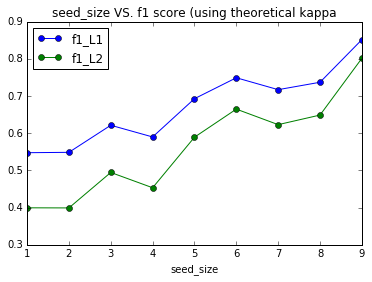

In [382]:
perf_df = pd.read_csv('outputs/effect_of_seed_size_suggested_kappa.csv')
avg_df = perf_df[['f1_L1', 'f1_L2', 'seed_size']].groupby('seed_size').mean()

fig, ax = plt.subplots(1, 1)
avg_df.reset_index(level=0, inplace=True)

avg_df.plot(x='seed_size', y=['f1_L1', 'f1_L2'], style=['o-', 'o-'], ax=ax)
ax.set_title('seed_size VS. f1 score (using theoretical kappa')